# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
petroldata = pd.read_csv("petrol.csv",header=0)
petrol = pd.DataFrame(petroldata)

#to remove the whitespaces in the column names
petrol.rename(columns=lambda x: x.strip(),inplace=True)

#Validating the data.
if pd.isnull(petrol) is True:
    print("Null value found")
if pd.isna(petrol) is True:
    print("NaN value found")

#Describing the data
print(petrol.describe())
oldshape = petrol.shape

             tax       income       highway         dl  consumption
count  48.000000    48.000000     48.000000  48.000000    48.000000
mean    7.668333  4241.833333   5565.416667   0.570333   576.770833
std     0.950770   573.623768   3491.507166   0.055470   111.885816
min     5.000000  3063.000000    431.000000   0.451000   344.000000
25%     7.000000  3739.000000   3110.250000   0.529750   509.500000
50%     7.500000  4298.000000   4735.500000   0.564500   568.500000
75%     8.125000  4578.750000   7156.000000   0.595250   632.750000
max    10.000000  5342.000000  17782.000000   0.724000   968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [55]:
cons = petrol.iloc[:,4]

Q1 = cons.quantile(0.25)
#Q1 is 508.5
Q3 = cons.quantile(0.75)
#Q3 is 630.25
IQR = Q3-Q1
#IQR is 121.75

lowercap = Q1-1.5*IQR
#lowercap is 325.87
uppercap = Q3+1.5*IQR
#uppercap is 812.87

for consumption in cons:
    
    if consumption < lowercap:
        # " petrol[petrol.iloc[:,4]==consumption].index[0] " --> returns the index of the consumption data
        #that is less than the lowercap
        petrol.drop(index = petrol[petrol.iloc[:,4]==consumption].index[0], axis = 0, inplace = True)
        #print(str(consumption)+" is less than the lowercap, hence dropped from dataframe")

    elif consumption > uppercap:
        # " petrol[petrol.iloc[:,4]==consumption].index[0] " --> returns the index of the consumption data
        #that is less than the uppercap
        petrol.drop(index = petrol[petrol.iloc[:,4]==consumption].index[0], axis = 0, inplace = True)
        #print(str(consumption)+" is more than the uppercap, hence dropped from dataframe")

newshape = petrol.shape
print("oldshape: "+str(oldshape)+"    newshape: "+str(newshape))

oldshape: (48, 5)    newshape: (46, 5)


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [56]:
corr = petrol.corr()
print(corr)

                  tax    income   highway        dl  consumption
tax          1.000000  0.028917 -0.535243 -0.251519    -0.472685
income       0.028917  1.000000  0.050926  0.115030    -0.404929
highway     -0.535243  0.050926  1.000000 -0.058466     0.065716
dl          -0.251519  0.115030 -0.058466  1.000000     0.600198
consumption -0.472685 -0.404929  0.065716  0.600198     1.000000


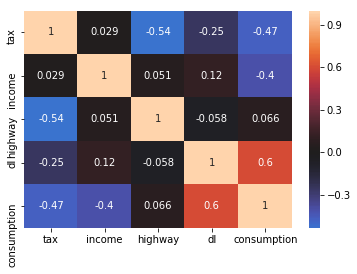

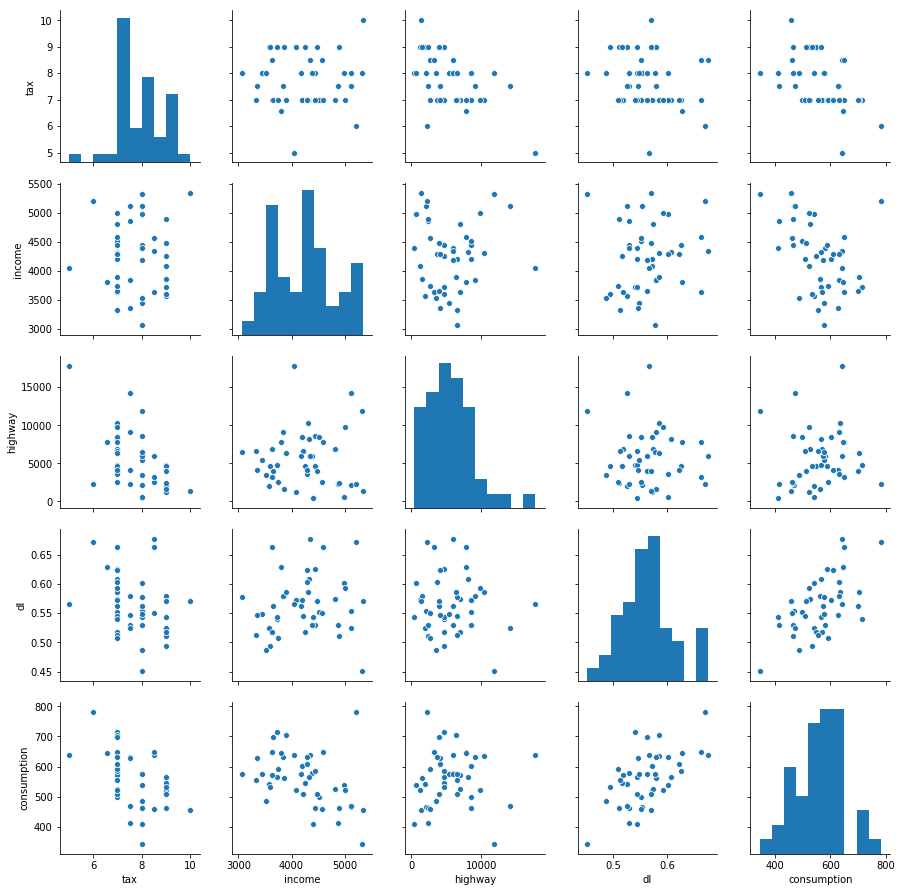

In [57]:
import seaborn as sns
k = sns.heatmap(corr,annot=True,center=0)
sns.pairplot(petrol)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [58]:
X = np.array(petrol.loc[:, "tax"]).reshape(-1,1)

In [59]:
Y = np.array(petrol.loc[:, "consumption"]).reshape(-1,1)

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("Y_train: "+str(Y_train.shape))
print("Y_test: "+str(Y_test.shape))

X_train: (36, 1)
X_test: (10, 1)
Y_train: (36, 1)
Y_test: (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [62]:
from sklearn import linear_model 
from matplotlib import pyplot as plt
reg = linear_model.LinearRegression()
#count = X_train.size
#i=0

reg.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[895.32462687] [[-42.8358209]]


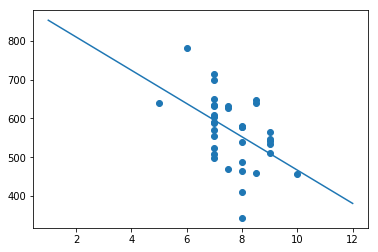

In [63]:
print(reg.intercept_,reg.coef_)

x=np.linspace(1,12,20)
x = x.reshape(-1,1)
y = reg.intercept_+x*reg.coef_

#plt.plot(x,y)
plt.scatter(X_train,Y_train)
plt.plot(x,y)
plt.show()

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

Y_pred = reg.predict(X_test)

Y_trainP=reg.predict(X_train)

mse = mean_squared_error(Y_pred,Y_test)
#print(mse)
rmse = sqrt(mse)
#print(rmse)

print(r2_score(Y_test, Y_pred))
print(r2_score(Y_train, Y_trainP))

0.04883431652907089
-0.5224402440841773


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [65]:
#adding income and highway features and splitting the data for test and training purposes
X1 = np.array(petrol[["income","highway"]])
#X1 = np.array(petrol[["highway","dl"]])
X1_train,X1_test,Y_train,Y_test = train_test_split(X1,Y,train_size=0.8,test_size=0.2)
print("X1_train: "+str(X1_train.shape))
print("X1_test: "+str(X1_test.shape))
print("Y_train: "+str(Y_train.shape))
print("Y_test: "+str(Y_test.shape))

X1_train: (36, 2)
X1_test: (10, 2)
Y_train: (36, 1)
Y_test: (10, 1)


In [66]:
#reg1 is a multi regression model
reg1=linear_model.LinearRegression()
reg1.fit(X1_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [67]:
print(reg1.coef_)
print(reg1.intercept_)

[[-0.05046152  0.00184712]]
[768.24332285]


In [86]:
Y_predicted = reg1.predict(X1_test)
Y_trainPred=reg1.predict(X1_train)

print(r2_score(Y_train,Y_trainPred))
print(r2_score(Y_test,Y_predicted))

0.10918204283846689
0.34261015347519497


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

R_squared value incerases as we increase the number of indipendent variables in our analysis because,
when we have only one variable, the equation of the regression medel will be of the form

    y = mx+c

where y is the dependent variabel, 
      x is the indipendent variable,
      m is the coefficient(slope of the model)
      c is intercept (error associated with the correlation between x and y)
      
The value of 'y' may be dependent of various other variables other than 'x'. hence to rectify that error, we add 'c' to the model. Now when we start considering more of the independent variables, the errors that are associated with the independent variales will reduce since we start considering more factors that affect 'y'(Hence, reducing the effect of unknown factors that affect 'y')